<a href="https://colab.research.google.com/github/namJeongwan/pythonAI/blob/master/Chapter03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

## 비지도 학습의 종류



*   비지도 변환(unsupervised transformation)
*   군집(clustering)

### 비지도 변환?
사람이나 다른 머신러닝 알고리즘이 보다 쉽게 해석할 수 있도록 데이터를 변환하는 알고리즘.
<br><br>
비지도 변환이 널리 사용되는 분야는 특성이 많은 고차원 데이터를 특성의 수를 줄이면서<br> 꼭 필요한 특징을 포함한 데이터로 표현하는 방법인
차원 축소(dimensionality reduction)이다.

<br>

### 군집?
데이터를 비슷한 것 끼리 그룹으로 묶는 것.

### 데이터 전처리와 스케일 조정

신경망과 SVM 같은 알고리즘은 데이터의 스케일에 매우 민감하다.<br>
그래서 보통 이런 알고리즘들에 맞게 데이터의 특성 값을 조정한다.<br>
보통 특성마다 스케일을 조정해서 데이터를 변경한다.

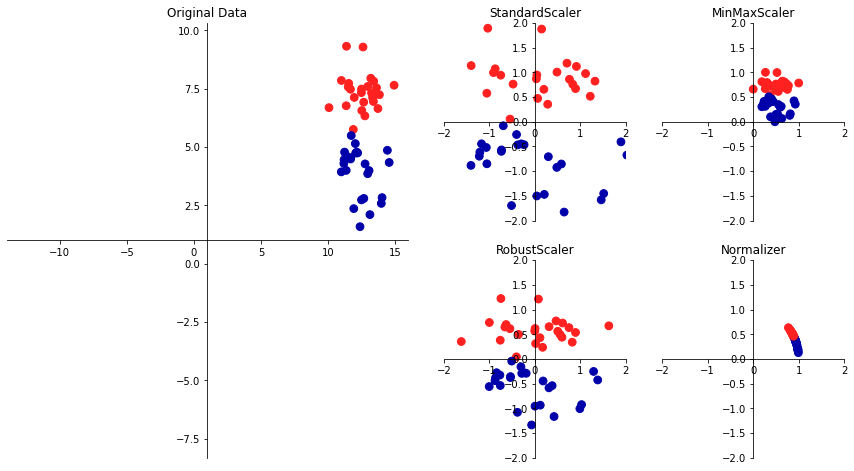

In [4]:
import mglearn

mglearn.plots.plot_scaling()

### 데이터 변환 적용하기

스케일을 조정하는 전처리 Method들은 보통 지도 학습 알고리즘을 적용하기 전에 적용한다.<br>
예제에서는 cancer 데이터셋에 커널SVM(SVC)을 적용하고, <br>
데이터 전처리에는 MinMaxScaler를 사용할 것이다.

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)


MinMaxScaler()

fit Method로 학습한 변환을 적용하려면, 즉 실제로 훈련 데이터의 스케일을 조정하려면,<br>
Scaler의 transform 메서드를 사용해야한다.

In [7]:
# 데이터 변환
X_train_scaled = scaler.transform(X_train)

# 스케일이 조정된 후 데이터셋의 속성을 출력
print(f"변환된 후 크기: {X_train_scaled.shape}")
print(f"스케일 조정 전 특성별 최소값:\n {X_train.min(axis=0)}")
print(f"스케일 조정 전 특성별 최대값:\n {X_train.max(axis=0)}")
print(f"스케일 조정 후 특성별 최소값:\n {X_train_scaled.min(axis=0)}")
print(f"스케일 조정 후 특성별 최소값:\n {X_train_scaled.max(axis=0)}")

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최소값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [8]:
# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)
print(f"스케일 조정 후 특성별 최소값:\n {X_test_scaled.min(axis=0)}")
print(f"스케일 조정 후 특성별 최소값:\n {X_test_scaled.max(axis=0)}")

스케일 조정 후 특성별 최소값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최소값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


테스트 데이터에서 최대 최소 값이 0과 1이 아닌것을 확인 할 수 있다..<br>
훈련 데이터와 테스트 데이터를 나누기 전에 Scale을 진행해야 하는 듯 하다

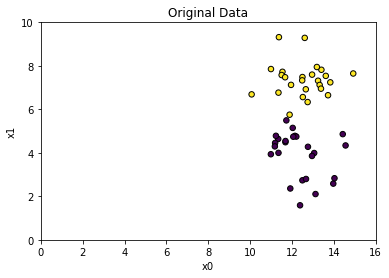

In [9]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 16)
plt.xlabel('x0')
plt.ylim(0, 10)
plt.ylabel('x1')
plt.title('Original Data')
plt.show()

이 데이터셋에 Quantile Transformer를 적용해 어떻게 스케일이 변환되는지 확인해보자

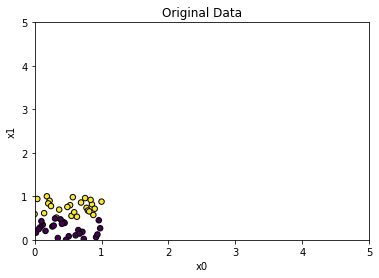

In [14]:
scaler = QuantileTransformer(n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 5)
plt.xlabel('x0')
plt.ylim(0, 5)
plt.ylabel('x1')
plt.title('Original Data')
plt.show()

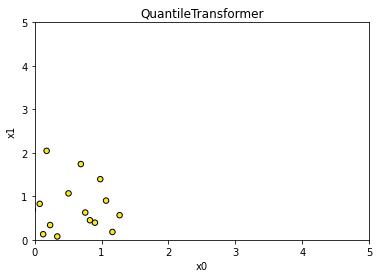

In [13]:

scaler = QuantileTransformer(output_distribution='normal', n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 5)
plt.xlabel('x0')
plt.ylim(0, 5)
plt.ylabel('x1')
plt.title(f'{type(scaler).__name__}')
plt.show()

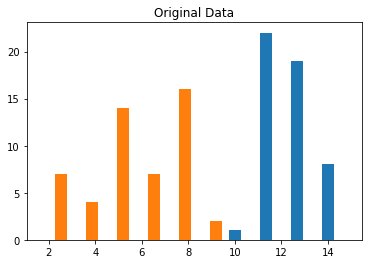

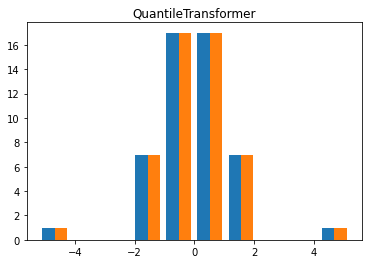

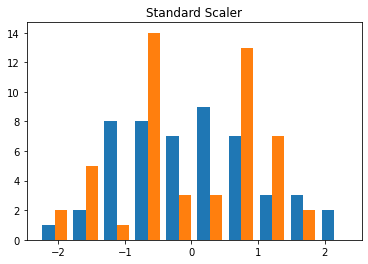

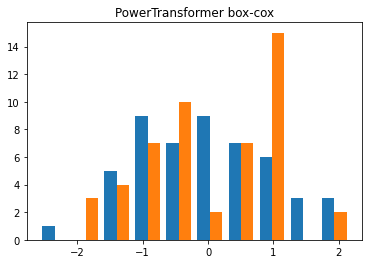

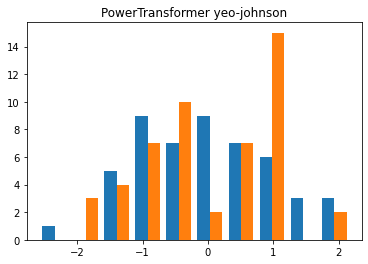

In [20]:
plt.hist(X)
plt.title('Original Data')
plt.show()

X_trans = QuantileTransformer(output_distribution='normal', n_quantiles=50).fit_transform(X)
plt.hist(X_trans)
plt.title("QuantileTransformer")
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('Standard Scaler')
plt.show()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()


### 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기

In [23]:
from sklearn.svm import SVC 

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
print(f"테스트 정확도: {svm.score(X_test, y_test): .2f}")

테스트 정확도:  0.63


In [26]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

print(f"스케일 조정된 테스트 정확도: {svm.score(X_test_scaled, y_test): .2f}")

스케일 조정된 테스트 정확도:  0.95


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

print(f"스케일(Standard) 조정된 테스트 정확도: {svm.score(X_test_scaled, y_test): .2f}")

스케일(Standard) 조정된 테스트 정확도:  0.97


## 차원 축소, 특성 추출, 매니폴드 학습

비지도 학습을 사용해 데이터를 변환하는 이유는 여러가지이다.<br>
가장 일반적인 동기는 시각화하거나, 데이터를 압축하거나, 추가적인 처리를 위해 정보가 더 잘 드러나는 표현을 찾기 위해서이다.<br><br>